# lib

In [4]:
import pickle
import warnings
warnings.filterwarnings('ignore')
import os
import pandas as pd
import numpy as np
import math
import datetime as dt
import matplotlib.pyplot as plt

# from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score 
# from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler , StandardScaler

from itertools import product
import statsmodels.api as sm

import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM

from itertools import cycle
import plotly.offline as py
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

plt.style.use('seaborn-darkgrid')

ImportError: DLL load failed while importing _arpack: The specified procedure could not be found.

In [3]:
# !pip install pandas_ta
import pandas_ta as ta

# preprocessing data

In [4]:
# https://www.kaggle.com/datasets/paulrohan2020/bitcoin-historic-prices-from-oct2015-to-oct2021?select=btc_ohlc_Oct_2015_to_Oct_2021.csv
# from google.colab import drive
# drive.mount('/content/drive')
# path_to_file = "./drive/MyDrive/btc_ohlc_Oct_2015_to_Oct_2021.csv"

path_to_file = "btc_ohlc_Oct_2015_to_Oct_2021.csv"

In [5]:
btc_input_df = pd.read_csv(path_to_file)
btc_input_df.tail()

,time,low,high,open,close,volume
3113271,2015-10-27 00:04:00,287.07,287.07,287.07,287.07,0.08610
3113272,2015-10-27 00:03:00,287.08,287.09,287.08,287.09,0.55440
3113273,2015-10-27 00:02:00,286.89,287.10,287.10,286.89,72.40320
3113274,2015-10-27 00:01:00,287.09,287.09,287.09,287.09,0.82276
3113275,2015-10-27 00:00:00,287.10,287.10,287.10,287.10,0.53620


In [6]:
btc_input_df_datetype = btc_input_df.astype({'time': 'datetime64'})
btc_input_df_datetype['close_log'] = np.log(btc_input_df_datetype['close'])

In [7]:
btc_input_df_datetype.drop(2381238,axis=0,inplace=True)
btc_input_df_datetype['close_log'][btc_input_df_datetype['close']<4]

Series([], Name: close_log, dtype: float64)

<AxesSubplot:title={'center':'Bitcoin Weighted Price'}, xlabel='time'>

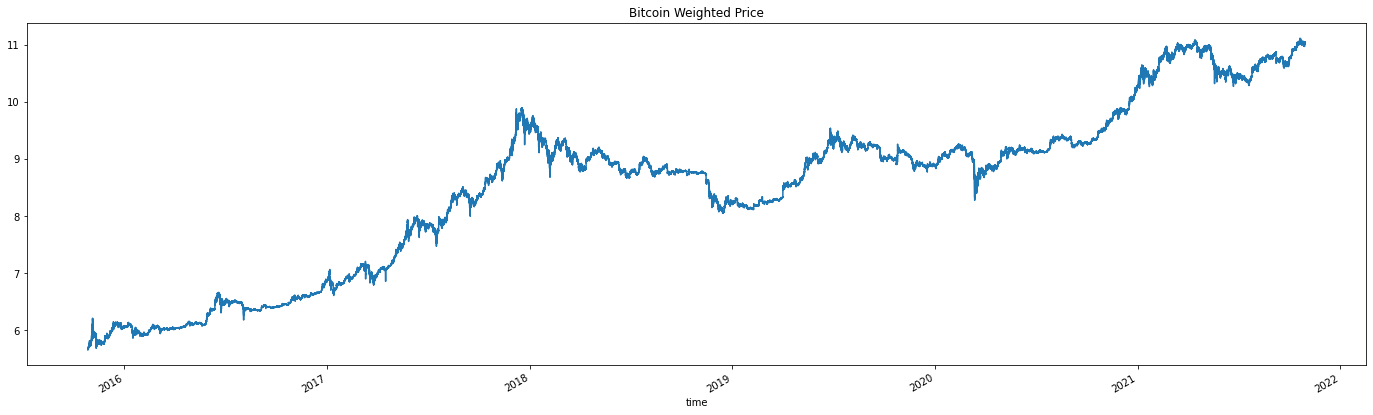

In [8]:
# btc_input_df_datetype.set_index("time").close.plot(figsize=(24,7), title="Bitcoin Weighted Price")
btc_input_df_datetype.set_index("time").close_log.plot(figsize=(24,7), title="Bitcoin Weighted Price")

In [9]:
btc_input_df_datetype['date'] = pd.to_datetime(btc_input_df_datetype['time'],unit='s').dt.date

display(btc_input_df_datetype.head())

group = btc_input_df_datetype.groupby('date')

btc_closing_price_groupby_date = group['close_log'].mean()

display(btc_closing_price_groupby_date.head(10))

,time,low,high,open,close,volume,close_log,date
0,2021-10-30 03:00:00,61868.81,61920.00,61888.18,61919.98,2.946079,11.033598,2021-10-30
1,2021-10-30 02:59:00,61882.74,61912.67,61903.16,61882.74,2.942357,11.032997,2021-10-30
2,2021-10-30 02:58:00,61854.82,61907.96,61854.82,61903.15,3.047848,11.033326,2021-10-30
3,2021-10-30 02:57:00,61848.04,61883.02,61883.01,61851.39,3.381070,11.032490,2021-10-30
4,2021-10-30 02:56:00,61879.33,61925.42,61907.47,61882.28,5.663128,11.032989,2021-10-30


date
2015-10-27    5.679741
2015-10-28    5.710364
2015-10-29    5.738202
2015-10-30    5.788838
2015-10-31    5.780111
2015-11-01    5.766747
2015-11-02    5.826106
2015-11-03    5.957086
2015-11-04    6.107486
2015-11-05    5.991228
Name: close_log, dtype: float64

In [10]:
btc = pd.DataFrame()
# btc['close_log'] =  group['close_log'].mean()
# btc['diff1_log'] = btc['close_log'].diff(1)
# btc['diff7_log'] = btc['close_log'].diff(7)
# btc['diff30_log'] = btc['close_log'].diff(30)
# btc['high'] =  group['high'].mean()
# btc['low'] =  group['low'].mean()
btc['close'] =  group['close'].mean()
# btc['diff1'] = btc['close'].diff(1)
btc['diff7'] = btc['close'].diff(7)
btc['diff30'] = btc['close'].diff(30)
btc['diff50'] = btc['close'].diff(50)
btc['diff100'] = btc['close'].diff(100)
btc['diff200'] = btc['close'].diff(200)
btc['diff400'] = btc['close'].diff(400)
btc['diff600'] = btc['close'].diff(600)
# btc['reverse_diff'] = btc['close'].shift(1) + btc['diff']

# dema, ema, fwma, hma, linreg, midpoint, pwma, rma,
# sinwma, sma, swma, t3, tema, trima, vidya, wma, zlma
# btc['ema20_clog'] = ta.ma("ema", btc['close_log'], length=20)
# btc['ema50_clog'] = ta.ma("ema", btc['close_log'], length=50)
# btc['ema100_clog'] = ta.ma("ema", btc['close_log'], length=100)
# btc['ema200_clog'] = ta.ma("ema", btc['close_log'], length=200)
# btc['ema400_clog'] = ta.ma("ema", btc['close_log'], length=400)
# btc['ema600_clog'] = ta.ma("ema", btc['close_log'], length=600)

btc['ema20'] = ta.ma("ema", btc['close'], length=20)
btc['ema50'] = ta.ma("ema", btc['close'], length=50)
btc['ema100'] = ta.ma("ema", btc['close'], length=100)
btc['ema200'] = ta.ma("ema", btc['close'], length=200)
btc['ema400'] = ta.ma("ema", btc['close'], length=400)
btc['ema600'] = ta.ma("ema", btc['close'], length=600)

btc['mom10'] = ta.mom(btc['close'],length=10)
btc['mom30'] = ta.mom(btc['close'],length=30)
btc['mom60'] = ta.mom(btc['close'],length=60)
btc['mom90'] = ta.mom(btc['close'],length=90)

# btc['atr10'] = ta.atr(btc.high, btc.low, btc.close, length=10)
# btc['atr30'] = ta.atr(btc.high, btc.low, btc.close, length=30)
# btc['atr60'] = ta.atr(btc.high, btc.low, btc.close, length=60)
# btc['atr90'] = ta.atr(btc.high, btc.low, btc.close, length=90)

btc['rsi14'] = ta.rsi(btc['close'],length=14)
btc['rsi30'] = ta.rsi(btc['close'],length=30)
btc['rsi60'] = ta.rsi(btc['close'],length=60)
btc['rsi90'] = ta.rsi(btc['close'],length=90)


# stoch =ta.stoch(btc.high, btc.low, btc.close)
# stoch = stoch['STOCHd_14_3_3']-stoch['STOCHk_14_3_3']
# btc['stoch'] = stoch

# btc['adx'] = ta.adx(btc.high, btc.low, btc.close, length=30)['ADX_30']


# btc['target_log'] = btc['close_log'].shift(-1)
btc['target'] = btc['close'].shift(-1)
btc = btc.dropna()
btc.drop('close', axis=1, inplace=True)

In [11]:
btc.tail()

,diff7,diff30,diff50,diff100,diff200,diff400,diff600,ema20,ema50,ema100,...,ema600,mom10,mom30,mom60,mom90,rsi14,rsi30,rsi60,rsi90,target
date,,,,,,,,,,,,,,,,,,,,,
2021-10-25,816.782903,20017.460771,12251.658146,31051.690167,5428.209229,51694.511938,53848.360833,58671.568054,53279.898711,49157.120108,...,32899.646011,2725.561507,20017.460771,15261.301208,24916.274625,68.402510,66.331892,61.434501,58.819632,62304.201403
2021-10-26,-433.183042,19503.145444,10516.487236,30533.287208,4098.203187,51627.025812,53282.921028,59017.533135,53633.792934,49417.458352,...,32997.498109,1028.473299,19503.145444,14563.043799,22429.920014,67.047933,65.696743,61.135873,58.628556,59508.951285
2021-10-27,-5455.561472,15986.450388,9541.098250,28332.401396,-345.170097,49040.841993,50409.821382,59064.334864,53864.191301,49617.289895,...,33085.722579,-1337.288333,15986.450388,10610.271285,19647.277826,56.140175,60.258706,58.501190,56.924889,60252.358194
2021-10-28,-4075.249903,18317.494924,13956.669222,30414.447542,472.413563,49820.209806,51197.472181,59177.479943,54114.707649,49827.885307,...,33176.127357,-1541.874306,18317.494924,11584.933479,20614.869410,58.092845,61.143598,58.979313,57.258914,61584.211944
2021-10-29,-594.829806,19759.308028,15164.886083,30389.836167,1490.242132,51139.476958,53013.228507,59406.692514,54407.629386,50060.683854,...,33270.663412,-1153.172500,19759.308028,13499.726597,19945.117229,61.407790,62.683531,59.822677,57.851051,62030.562210


In [12]:
df_corr = btc.corr()
df_corr

,diff7,diff30,diff50,diff100,diff200,diff400,diff600,ema20,ema50,ema100,...,ema600,mom10,mom30,mom60,mom90,rsi14,rsi30,rsi60,rsi90,target
diff7,1.000000,0.496685,0.442578,0.290192,0.122492,0.179940,0.196922,0.083383,0.048344,0.035070,...,0.065762,0.866096,0.496685,0.416916,0.330493,0.540020,0.443531,0.371164,0.340936,0.195334
diff30,0.496685,1.000000,0.827351,0.597411,0.279222,0.345611,0.365722,0.264727,0.169868,0.109045,...,0.113470,0.596017,1.000000,0.793470,0.657805,0.573443,0.612845,0.581163,0.557195,0.359423
diff50,0.442578,0.827351,1.000000,0.770472,0.383491,0.402688,0.416283,0.331161,0.228448,0.141926,...,0.099379,0.528969,0.827351,0.939523,0.820537,0.490028,0.591368,0.612096,0.608031,0.412197
diff100,0.290192,0.597411,0.770472,1.000000,0.632071,0.549162,0.530710,0.495075,0.410135,0.300898,...,0.156100,0.355280,0.597411,0.839554,0.968235,0.339540,0.469895,0.568408,0.603781,0.542046
diff200,0.122492,0.279222,0.383491,0.632071,1.000000,0.744543,0.697826,0.720858,0.693398,0.626409,...,0.404492,0.148061,0.279222,0.431634,0.582802,0.147722,0.252190,0.403558,0.492887,0.722819
diff400,0.179940,0.345611,0.402688,0.549162,0.744543,1.000000,0.962572,0.963155,0.947178,0.919972,...,0.814971,0.221421,0.345611,0.439800,0.532490,0.124032,0.182263,0.270221,0.334637,0.968659
diff600,0.196922,0.365722,0.416283,0.530710,0.697826,0.962572,1.000000,0.961709,0.945172,0.922400,...,0.841746,0.239781,0.365722,0.445359,0.518332,0.157619,0.201597,0.256074,0.300328,0.970284
ema20,0.083383,0.264727,0.331161,0.495075,0.720858,0.963155,0.961709,1.000000,0.993534,0.974508,...,0.900829,0.121072,0.264727,0.372466,0.473509,0.058368,0.113438,0.184731,0.234346,0.990417
ema50,0.048344,0.169868,0.228448,0.410135,0.693398,0.947178,0.945172,0.993534,1.000000,0.992274,...,0.924380,0.072906,0.169868,0.271180,0.383422,0.005052,0.046663,0.115309,0.166176,0.975140
ema100,0.035070,0.109045,0.141926,0.300898,0.626409,0.919972,0.922400,0.974508,0.992274,1.000000,...,0.955053,0.052958,0.109045,0.176448,0.275736,-0.026727,-0.006536,0.045995,0.091429,0.952011


In [13]:
with open('btc.moh','wb') as f :
    pickle.dump(btc,f)

# Load data

In [14]:
# from google.colab import drive
# drive.mount('/content/drive')
with open('btc.moh','rb') as f :
    btc = pickle.load(f)

In [15]:
btc.head(2)

,diff7,diff30,diff50,diff100,diff200,diff400,diff600,ema20,ema50,ema100,...,ema600,mom10,mom30,mom60,mom90,rsi14,rsi30,rsi60,rsi90,target
date,,,,,,,,,,,,,,,,,,,,,
2017-06-18,-364.469955,628.823812,1210.491060,1358.176459,1828.723238,2108.813980,2273.802916,2545.019910,2218.487357,1847.481854,...,783.945990,-183.437920,628.823812,1365.299003,1531.197789,54.083641,60.039645,62.518791,63.019899,2553.458903
2017-06-19,-273.679950,551.601592,1199.359467,1372.954359,1804.840310,2093.059629,2251.467069,2545.823624,2231.623496,1861.461598,...,789.834552,-269.659144,551.601592,1328.099758,1467.666354,53.483013,59.672856,62.265919,62.811644,2653.103618


In [16]:
btc.columns 

Index(['diff7', 'diff30', 'diff50', 'diff100', 'diff200', 'diff400', 'diff600',
       'ema20', 'ema50', 'ema100', 'ema200', 'ema400', 'ema600', 'mom10',
       'mom30', 'mom60', 'mom90', 'rsi14', 'rsi30', 'rsi60', 'rsi90',
       'target'],
      dtype='object')

In [28]:
from sklearn.preprocessing import MinMaxScaler , StandardScaler

# scaler = MinMaxScaler(feature_range=(0, 1))
# StandardScaler
scaler = StandardScaler()

scaler_t = StandardScaler()
# btc.close = scaler_t.fit_transform(btc.close.values.reshape(-1,1))
btc.target = scaler_t.fit_transform(btc.target.values.reshape(-1,1))

# scaler_tlog = StandardScaler()
# btc.close_log = scaler_tlog.fit_transform(btc.close_log.values.reshape(-1,1))
# btc.target_log = scaler_tlog.transform(btc.target_log.values.reshape(-1,1))


# scaler_high = StandardScaler()
# btc.high = scaler_high.fit_transform(btc.high.values.reshape(-1,1))

# scaler_low = StandardScaler()
# btc.low = scaler_low.fit_transform(btc.low.values.reshape(-1,1))


# scaler_diff1_log = StandardScaler()
# btc.diff1_log = scaler_diff1_log.fit_transform(btc.diff1_log.values.reshape(-1,1))

# scaler_diff7_log = StandardScaler()
# btc.diff7_log = scaler_diff7_log.fit_transform(btc.diff7_log.values.reshape(-1,1))

# scaler_diff30_log = StandardScaler()
# btc.diff30_log = scaler_diff30_log.fit_transform(btc.diff30_log.values.reshape(-1,1))




scaler_diff = StandardScaler()
btc.diff7 = scaler_diff.fit_transform(btc.diff7.values.reshape(-1,1))

btc.diff30 = scaler_diff.transform(btc.diff30.values.reshape(-1,1))

btc.diff50 = scaler_diff.transform(btc.diff50.values.reshape(-1,1))

btc.diff100 = scaler_diff.transform(btc.diff100.values.reshape(-1,1))

btc.diff200 = scaler_diff.transform(btc.diff200.values.reshape(-1,1))

btc.diff400 = scaler_diff.transform(btc.diff400.values.reshape(-1,1))

btc.diff600 = scaler_diff.transform(btc.diff600.values.reshape(-1,1))





# btc.ema20_clog = scaler_tlog.transform(btc.ema20_clog.values.reshape(-1,1))

# btc.ema50_clog = scaler_tlog.transform(btc.ema50_clog.values.reshape(-1,1))

# btc.ema100_clog = scaler_tlog.transform(btc.ema100_clog.values.reshape(-1,1))

# btc.ema200_clog = scaler_tlog.transform(btc.ema200_clog.values.reshape(-1,1))

# btc.ema400_clog = scaler_tlog.transform(btc.ema400_clog.values.reshape(-1,1))

# btc.ema600_clog = scaler_tlog.transform(btc.ema600_clog.values.reshape(-1,1))




btc.ema20 = scaler_t.transform(btc.ema20.values.reshape(-1,1))

btc.ema50 = scaler_t.transform(btc.ema50.values.reshape(-1,1))

btc.ema100 = scaler_t.transform(btc.ema100.values.reshape(-1,1))

btc.ema200 = scaler_t.transform(btc.ema200.values.reshape(-1,1))

btc.ema400 = scaler_t.transform(btc.ema400.values.reshape(-1,1))

btc.ema600 = scaler_t.transform(btc.ema600.values.reshape(-1,1))



scaler_rsi = StandardScaler()
btc.rsi14 = scaler_rsi.fit_transform(btc.rsi14.values.reshape(-1,1))

btc.rsi30 = scaler_rsi.transform(btc.rsi30.values.reshape(-1,1))

btc.rsi60 = scaler_rsi.transform(btc.rsi60.values.reshape(-1,1))

btc.rsi90 = scaler_rsi.transform(btc.rsi90.values.reshape(-1,1))




scaler_mom = StandardScaler()
btc.mom10 = scaler_mom.fit_transform(btc.mom10.values.reshape(-1,1))

btc.mom30 = scaler_mom.transform(btc.mom30.values.reshape(-1,1))

btc.mom60 = scaler_mom.transform(btc.mom60.values.reshape(-1,1))

btc.mom90 = scaler_mom.transform(btc.mom90.values.reshape(-1,1))




# scaler_atr10 = StandardScaler()
# btc.atr10 = scaler_atr10.fit_transform(btc.atr10.values.reshape(-1,1))

# scaler_atr30 = StandardScaler()
# btc.atr30 = scaler_atr30.fit_transform(btc.atr30.values.reshape(-1,1))

# scaler_atr60 = StandardScaler()
# btc.atr60 = scaler_atr60.fit_transform(btc.atr60.values.reshape(-1,1))

# scaler_atr90 = StandardScaler()
# btc.atr90 = scaler_atr90.fit_transform(btc.atr90.values.reshape(-1,1))



Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\WEBFLAX-FOUR\anaconda3\envs\deep\lib\site-packages\IPython\core\interactiveshell.py", line 3369, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\WEBFLAX-FOUR\AppData\Local\Temp\ipykernel_26648\984478735.py", line 1, in <cell line: 1>
    from sklearn.preprocessing import MinMaxScaler , StandardScaler
  File "C:\Users\WEBFLAX-FOUR\anaconda3\envs\deep\lib\site-packages\sklearn\__init__.py", line 82, in <module>
    from .base import clone
  File "C:\Users\WEBFLAX-FOUR\anaconda3\envs\deep\lib\site-packages\sklearn\base.py", line 17, in <module>
    from .utils import _IS_32BIT
  File "C:\Users\WEBFLAX-FOUR\anaconda3\envs\deep\lib\site-packages\sklearn\utils\__init__.py", line 28, in <module>
    from .fixes import np_version, parse_version
  File "C:\Users\WEBFLAX-FOUR\anaconda3\envs\deep\lib\site-packages\sklearn\utils\fixes.py", line 20, in <module>
    import scipy.stats
  File "C:\Users\WEBFLAX-FOUR

In [97]:
btc.head(2)

,diff7,diff30,diff50,diff100,diff200,diff400,diff600,ema20,ema50,ema100,...,ema600,mom10,mom30,mom60,mom90,rsi14,rsi30,rsi60,rsi90,target
date,,,,,,,,,,,,,,,,,,,,,
2017-06-18,-364.469955,628.823812,1210.491060,1358.176459,1828.723238,2108.813980,2273.802916,2545.019910,2218.487357,1847.481854,...,783.945990,-183.437920,628.823812,1365.299003,1531.197789,54.083641,60.039645,62.518791,63.019899,2553.458903
2017-06-19,-273.679950,551.601592,1199.359467,1372.954359,1804.840310,2093.059629,2251.467069,2545.823624,2231.623496,1861.461598,...,789.834552,-269.659144,551.601592,1328.099758,1467.666354,53.483013,59.672856,62.265919,62.811644,2653.103618


### plot

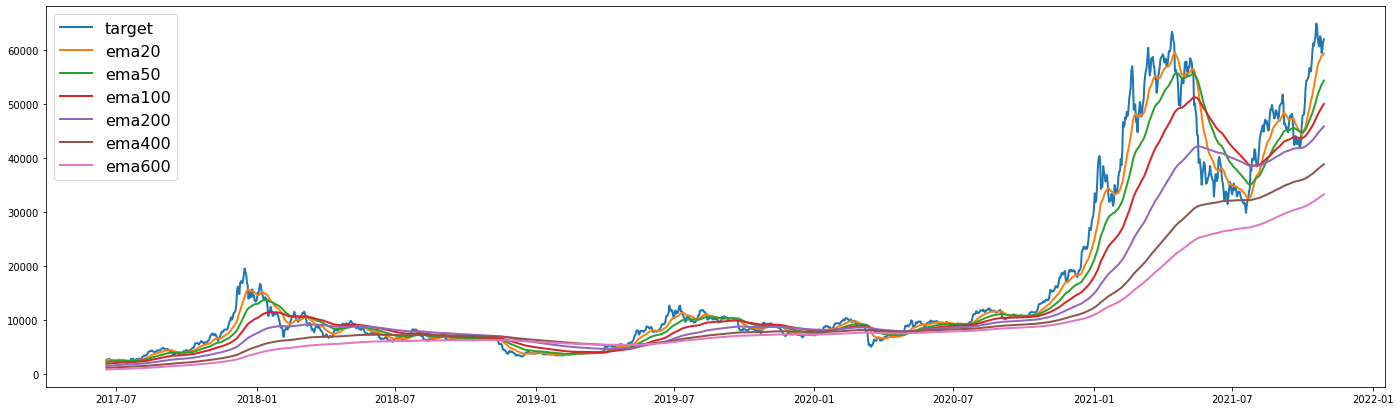

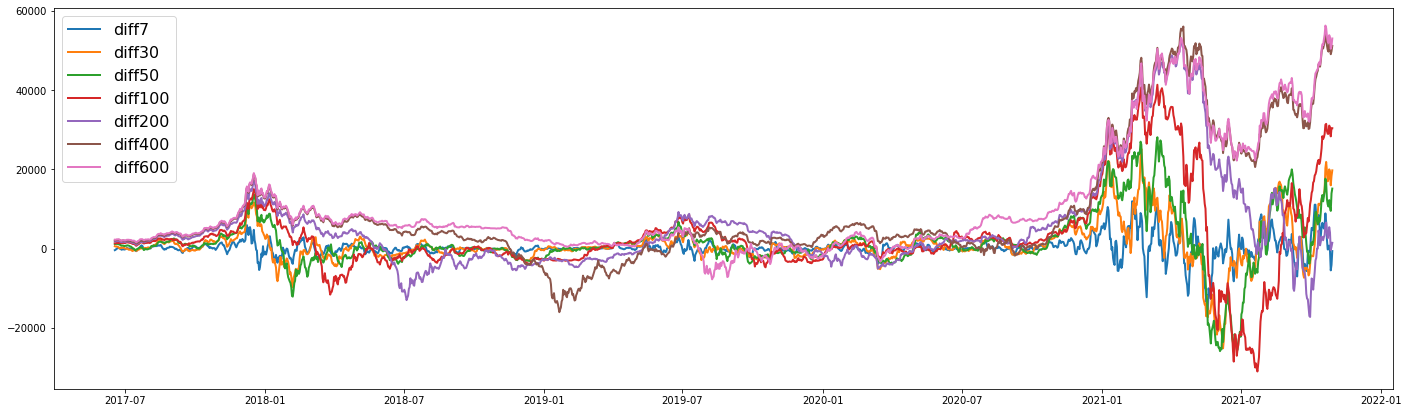

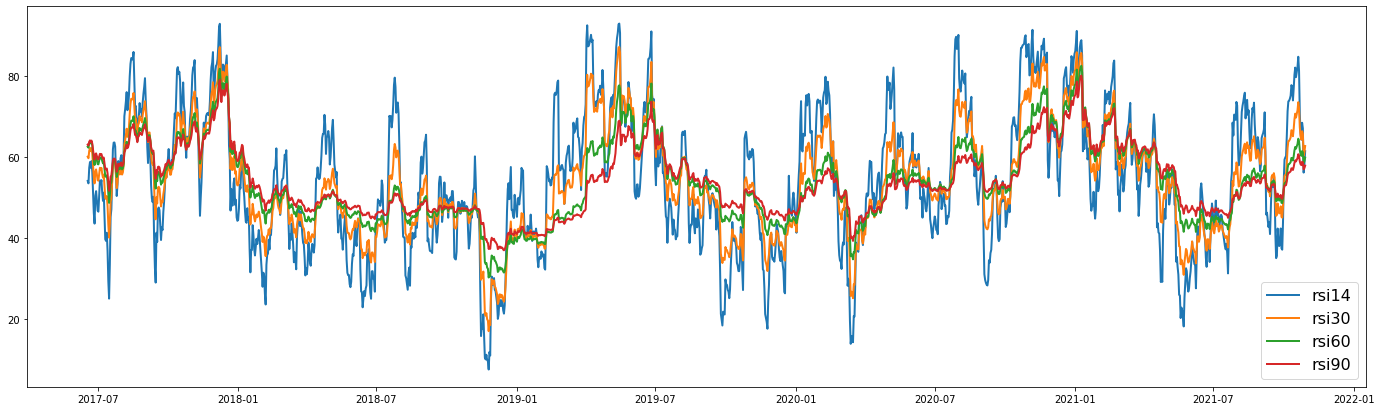

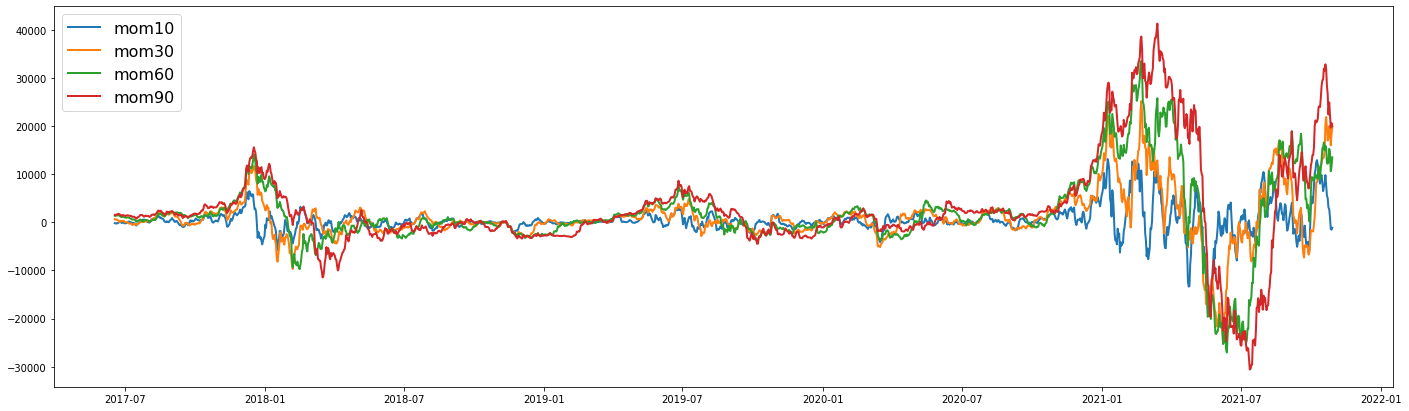

In [25]:

fig, ax = plt.subplots(1, figsize=(24, 7))
ax.plot(btc['target'], label='target', linewidth=2)

ax.plot(btc['ema20'], label='ema20', linewidth=2)
ax.plot(btc['ema50'], label='ema50', linewidth=2)
ax.plot(btc['ema100'], label='ema100', linewidth=2)
ax.plot(btc['ema200'], label='ema200', linewidth=2)
ax.plot(btc['ema400'], label='ema400', linewidth=2)
ax.plot(btc['ema600'], label='ema600', linewidth=2)
ax.legend(loc='best', fontsize=16)

fig, ax = plt.subplots(1, figsize=(24, 7))
ax.plot(btc['diff7'], label='diff7', linewidth=2)
ax.plot(btc['diff30'], label='diff30', linewidth=2)
ax.plot(btc['diff50'], label='diff50', linewidth=2)
ax.plot(btc['diff100'], label='diff100', linewidth=2)
ax.plot(btc['diff200'], label='diff200', linewidth=2)
ax.plot(btc['diff400'], label='diff400', linewidth=2)
ax.plot(btc['diff600'], label='diff600', linewidth=2)
ax.legend(loc='best', fontsize=16)


fig, ax = plt.subplots(1, figsize=(24, 7))
ax.plot(btc['rsi14'], label='rsi14', linewidth=2)
ax.plot(btc['rsi30'], label='rsi30', linewidth=2)
ax.plot(btc['rsi60'], label='rsi60', linewidth=2)
ax.plot(btc['rsi90'], label='rsi90', linewidth=2)
ax.legend(loc='best', fontsize=16)

fig, ax = plt.subplots(1, figsize=(24, 7))
ax.plot(btc['mom10'], label='mom10', linewidth=2)
ax.plot(btc['mom30'], label='mom30', linewidth=2)
ax.plot(btc['mom60'], label='mom60', linewidth=2)
ax.plot(btc['mom90'], label='mom90', linewidth=2)
ax.legend(loc='best', fontsize=16)



# creat data lstm

In [115]:
look_back_ = 30
prediction_days = 60
future_ = 30

look_b = btc[:][:len(btc)-(future_)]

df_train_= btc[:][:len(btc)-(prediction_days+future_)]#values.reshape(-1,1)

df_test_= btc[:][len(btc)-(prediction_days+future_+look_back_-1):len(btc)-future_]#.values.reshape(-1,1)

future_ = btc[:][len(btc)-(future_+look_back_-1):]


In [110]:
df_train_.columns

Index(['diff7', 'diff30', 'diff50', 'diff100', 'diff200', 'diff400', 'diff600',
       'ema20', 'ema50', 'ema100', 'ema200', 'ema400', 'ema600', 'mom10',
       'mom30', 'mom60', 'mom90', 'rsi14', 'rsi30', 'rsi60', 'rsi90',
       'target'],
      dtype='object')

In [116]:
col = ['diff7', 'diff30', 'diff50', 'diff100', 'diff200', 'diff400', 'diff600', 'ema20', 'ema50', 'ema100', 'ema200', 'ema400', 'ema600', 'mom10', 'mom30', 'mom60', 'mom90', 'rsi14', 'rsi30', 'rsi60', 'rsi90', 'target']
df_train = df_train_[:][col]
df_test = df_test_[:][col]
future = future_[:][col]
df_test.head(2)

,diff7,diff30,diff50,diff100,diff200,diff400,diff600,ema20,ema50,ema100,...,ema600,mom10,mom30,mom60,mom90,rsi14,rsi30,rsi60,rsi90,target
date,,,,,,,,,,,,,,,,,,,,,
2021-07-03,1.075364,-1.879601,-6.767674,-7.575167,6.159451,10.308380,10.584121,1.236062,1.461679,1.680455,...,0.722323,0.062746,-1.585233,-7.362715,-8.201718,-0.504925,-0.685709,-0.573361,-0.440077,1.266204
2021-07-04,0.826548,-0.867725,-5.793703,-7.635579,6.263732,10.695228,11.019945,1.238932,1.454013,1.672252,...,0.724133,0.398761,-0.753123,-7.236909,-7.991126,-0.302094,-0.593137,-0.529476,-0.410610,1.190858


In [117]:
# many to one

from collections import deque
def dataset_generator_lstm(dataset, look_back=look_back_):
  sequential_data = [] 
  prev_days = deque(maxlen=look_back)
  for i in dataset.values:
    prev_days.append([n for n in i[:-1]])
    if len(prev_days) == look_back:  
      sequential_data.append([np.array(prev_days), i[-1]])
  dataX=[]
  dataY=[]
  for seq, target in sequential_data: 
    dataX.append(seq) 
    dataY.append(target) 
  return np.array(dataX), np.array(dataY)

trainX, trainY = dataset_generator_lstm(df_train)

testX, testY = dataset_generator_lstm(df_test)

futureX, futureY = dataset_generator_lstm(future)

print("trainX: ", trainX.shape)
print("trainY: ", trainY.shape)
print("testX: ", testX.shape)
print("testY", testY.shape)
print("futureX: ", futureX.shape)
print("futureY", futureY.shape)

trainX:  (1476, 30, 21)
trainY:  (1476,)
testX:  (60, 30, 21)
testY (60,)
futureX:  (30, 30, 21)
futureY (30,)


# train

In [118]:
regressor = Sequential()

regressor.add(LSTM(units = 1024, activation = 'relu',return_sequences=True, input_shape = (trainX.shape[1], trainX.shape[2])))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 512, activation = 'relu',return_sequences=True, input_shape = (trainX.shape[1], trainX.shape[2])))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 265, activation = 'relu',return_sequences=True, input_shape = (trainX.shape[1], trainX.shape[2])))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 265, activation = 'relu',return_sequences=True, input_shape = (trainX.shape[1], trainX.shape[2])))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 128, activation = 'relu', input_shape = (trainX.shape[1], trainX.shape[2])))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = look_back_, activation = 'relu'))

regressor.add(Dense(units = 1))

regressor.summary()


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_28 (LSTM)              (None, 30, 1024)          4284416   
                                                                 
 dropout_28 (Dropout)        (None, 30, 1024)          0         
                                                                 
 lstm_29 (LSTM)              (None, 30, 512)           3147776   
                                                                 
 dropout_29 (Dropout)        (None, 30, 512)           0         
                                                                 
 lstm_30 (LSTM)              (None, 30, 265)           824680    
                                                                 
 dropout_30 (Dropout)        (None, 30, 265)           0         
                                                                 
 lstm_31 (LSTM)              (None, 30, 265)          

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping


regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

checkpoint_path = 'my_best_model.hdf5'

checkpoint = ModelCheckpoint(filepath=checkpoint_path, 
                             monitor='val_loss',
                             verbose=1, 
                             save_best_only=True,
                             mode='min')


earlystopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

callbacks = [checkpoint, earlystopping]


# history = regressor.fit(trainX[(len(trainY)-370):], trainY[(len(trainY)-370):], batch_size = 128, epochs = 300, verbose=1, shuffle=False, validation_data=(testX, testY), callbacks=callbacks)
history = regressor.fit(trainX, trainY, batch_size = 128, epochs = 300, verbose=1, shuffle=False, validation_data=(testX, testY), callbacks=callbacks)

Epoch 1/300
12/12 [==============================] - ETA: 0s - loss: 9248.6895
Epoch 1: val_loss improved from inf to 93865.96875, saving model to my_best_model.hdf5
12/12 [==============================] - 76s 6s/step - loss: 9248.6895 - val_loss: 93865.9688
Epoch 2/300
12/12 [==============================] - ETA: 0s - loss: 2684898304.0000
Epoch 2: val_loss did not improve from 93865.96875
12/12 [==============================] - 69s 6s/step - loss: 2684898304.0000 - val_loss: 622706304.0000
Epoch 3/300
12/12 [==============================] - ETA: 0s - loss: 5492149760.0000
Epoch 3: val_loss did not improve from 93865.96875
12/12 [==============================] - 69s 6s/step - loss: 5492149760.0000 - val_loss: 3417107712.0000
Epoch 4/300
 7/12 [================>.............] - ETA: 28s - loss: 20466132.0000

In [ ]:
plt.figure(figsize=(16,7))
plt.plot(history.history['loss'], label='train')

plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [76]:
from tensorflow.keras.models import load_model

model_from_saved_checkpoint = load_model(checkpoint_path)

# test test

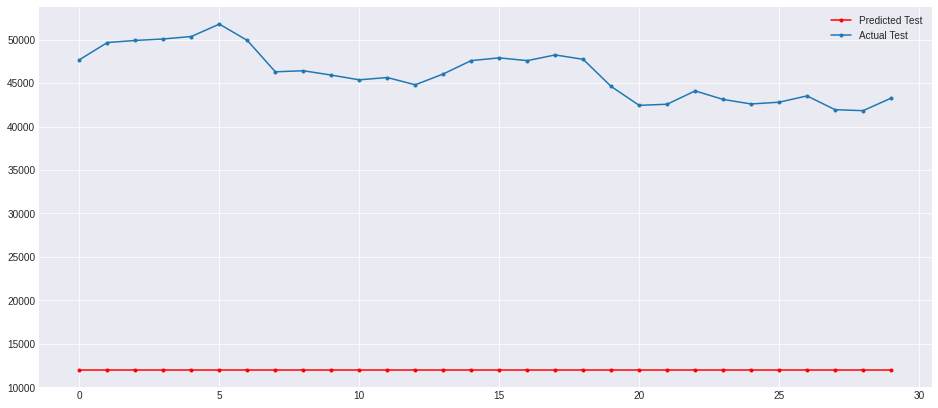

In [77]:
plt.figure(figsize=(16,7))

# log
predicted_btc_price_test_data = model_from_saved_checkpoint.predict(testX)
predicted_btc_price_test_data = scaler_tlog.inverse_transform(predicted_btc_price_test_data.reshape(-1, 1))
test_actual = scaler_tlog.inverse_transform(testY.reshape(-1, 1))

plt.plot(np.exp(predicted_btc_price_test_data), 'r', marker='.', label='Predicted Test')
plt.plot(np.exp(test_actual), marker='.', label='Actual Test')

# # manoal
# predicted_btc_price_test_data = model_from_saved_checkpoint.predict(testX)
# predicted_btc_price_test_data = scaler_t.inverse_transform(predicted_btc_price_test_data.reshape(-1, 1))
# test_actual = scaler_t.inverse_transform(testY.reshape(-1, 1))

# plt.plot(predicted_btc_price_test_data, 'r', marker='.', label='Predicted Test')
# plt.plot(test_actual, marker='.', label='Actual Test')


plt.legend()
plt.show()

#test train

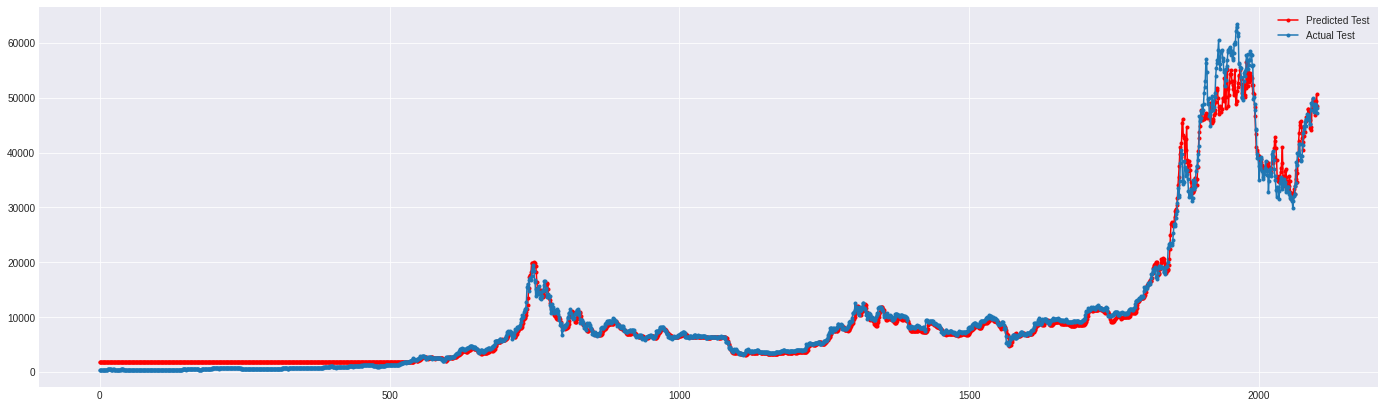

In [32]:
plt.figure(figsize=(24,7))

# log
predicted_btc_price_train_data = model_from_saved_checkpoint.predict(trainX)
predicted_btc_price_train_data = scaler_tlog.inverse_transform(predicted_btc_price_train_data.reshape(-1, 1))
train_actual = scaler_tlog.inverse_transform(trainY.reshape(-1, 1))

plt.plot(np.exp(predicted_btc_price_train_data), 'r', marker='.', label='Predicted Test')
plt.plot(np.exp(train_actual), marker='.', label='Actual Test')

# # manoal
# predicted_btc_price_train_data = model_from_saved_checkpoint.predict(trainX)
# predicted_btc_price_train_data = scaler_t.inverse_transform(predicted_btc_price_train_data.reshape(-1, 1))
# train_actual = scaler_t.inverse_transform(trainY.reshape(-1, 1))

# plt.plot(predicted_btc_price_train_data, 'r', marker='.', label='Predicted Test')
# plt.plot(train_actual, marker='.', label='Actual Test')


plt.legend()
plt.show()

# score

## log

In [223]:
rmse_lstm_test = math.sqrt(mean_squared_error(np.exp(test_actual), np.exp(predicted_btc_price_test_data)))

print('Test RMSE: %.3f' % rmse_lstm_test)


Test RMSE: 6276.525


In [224]:
rmse_lstm_train = math.sqrt(mean_squared_error(np.exp(train_actual), np.exp(predicted_btc_price_train_data)))

print('Test RMSE: %.3f' % rmse_lstm_train)


Test RMSE: 2010.802


## manoal

In [152]:
rmse_lstm_test = math.sqrt(mean_squared_error(test_actual, predicted_btc_price_test_data))

print('Test RMSE: %.3f' % rmse_lstm_test)


Test RMSE: 2951.213


In [153]:
rmse_lstm_train = math.sqrt(mean_squared_error(train_actual, predicted_btc_price_train_data))

print('Test RMSE: %.3f' % rmse_lstm_train)


Test RMSE: 1503.741


# future

###### genertor

In [35]:
look_b.tail(7)

,close_log,diff1_log,diff7_log,diff30_log,close,diff1,diff7,diff30,rsi,mom,target_log,target
date,,,,,,,,,,,,
2021-09-23,1.526519,1.010844,-0.955004,-0.735054,2.186577,2.306546,-1.949076,-1.264034,-0.825745,-0.395953,1.510573,2.121737
2021-09-24,1.510573,-0.763371,-1.106411,-0.773862,2.121737,-1.526758,-2.264716,-1.336361,-0.994597,-1.283523,1.501905,2.085508
2021-09-25,1.501905,-0.448938,-1.354658,-0.744568,2.085508,-0.872251,-2.847778,-1.251775,-1.085844,-2.115735,1.505278,2.099442
2021-09-26,1.505278,0.071371,-1.208299,-0.759213,2.099442,0.275288,-2.500280,-1.293334,-1.027562,-2.157325,1.517183,2.147888
2021-09-27,1.517183,0.440074,-0.398834,-0.789938,2.147888,1.064788,-0.632671,-1.391859,-0.824609,-1.740665,1.490817,2.041276
2021-09-28,1.490817,-1.213665,-0.276198,-0.926464,2.041276,-2.482334,-0.342978,-1.698312,-1.120085,-2.639959,1.488943,2.033892
2021-09-29,1.488943,-0.155329,-0.330620,-0.886788,2.033892,-0.212383,-0.458628,-1.591450,-1.139407,-2.481561,1.512942,2.130458


In [168]:
# def rsi():
#   return scaler_rsi.transform(np.array(ta.rsi(pd.Series(data=np.exp(scaler_tlog.inverse_transform(np.array(c_log).reshape(-1,1))).reshape(-1)),length=14))[-1].reshape(-1,1)).reshape(-1,1)

def mom30():
  return scaler_mom30.transform(np.array(np.array(ta.mom(pd.Series(data=np.exp(scaler_tlog.inverse_transform(np.array(c_log).reshape(-1,1))).reshape(-1)),length=30))[-1].reshape(-1,1))).reshape(-1,1)

def mom60():
  return scaler_mom60.transform(np.array(np.array(ta.mom(pd.Series(data=np.exp(scaler_tlog.inverse_transform(np.array(c_log).reshape(-1,1))).reshape(-1)),length=60))[-1].reshape(-1,1))).reshape(-1,1)

def mom90():
  return scaler_mom90.transform(np.array(np.array(ta.mom(pd.Series(data=np.exp(scaler_tlog.inverse_transform(np.array(c_log).reshape(-1,1))).reshape(-1)),length=90))[-1].reshape(-1,1))).reshape(-1,1)

  
# def diff1_log(): # target log
#   d_old = scaler_tlog.inverse_transform(np.array(c_log)[-1].reshape(-1,1))
#   d_new = scaler_tlog.inverse_transform(np.array(per).reshape(-1,1)).reshape(-1,1)
#   d = scaler_diff1_log.transform(np.array(d_new - d_old).reshape(-1,1))
#   return d

# def diff7_log(): # target log
#   d_old = scaler_tlog.inverse_transform(np.array(c_log)[-7].reshape(-1,1))
#   d_new = scaler_tlog.inverse_transform(np.array(per).reshape(-1,1)).reshape(-1,1)
#   d = scaler_diff7_log.transform(np.array(d_new - d_old).reshape(-1,1))
#   return d

# def diff30_log(): # target log
#   d_old = scaler_tlog.inverse_transform(np.array(c_log)[-30].reshape(-1,1))
#   d_new = scaler_tlog.inverse_transform(np.array(per).reshape(-1,1)).reshape(-1,1)
#   d = scaler_diff30_log.transform(np.array(d_new - d_old).reshape(-1,1))
#   return d

# def diff1(): # target log
#   d_old = np.exp(scaler_tlog.inverse_transform(np.array(c_log)[-1].reshape(-1,1)))
#   d_new = np.exp(scaler_tlog.inverse_transform(np.array(per).reshape(-1,1))).reshape(-1,1)
#   d = scaler_diff1.transform(np.array(d_new - d_old).reshape(-1,1))
#   return d

# def diff7(): # target log
#   d_old = np.exp(scaler_tlog.inverse_transform(np.array(c_log)[-8].reshape(-1,1)))
#   d_new = np.exp(scaler_tlog.inverse_transform(np.array(per).reshape(-1,1))).reshape(-1,1)
#   d = scaler_diff7.transform(np.array(d_new - d_old).reshape(-1,1))
#   return d

def diff30(): # target log
  d_old = np.exp(scaler_tlog.inverse_transform(np.array(c_log)[-31].reshape(-1,1)))
  d_new = np.exp(scaler_tlog.inverse_transform(np.array(per).reshape(-1,1))).reshape(-1,1)
  d = scaler_diff30.transform(np.array(d_new - d_old).reshape(-1,1))
  return d

  def diff60(): # target log
  d_old = np.exp(scaler_tlog.inverse_transform(np.array(c_log)[-61].reshape(-1,1)))
  d_new = np.exp(scaler_tlog.inverse_transform(np.array(per).reshape(-1,1))).reshape(-1,1)
  d = scaler_diff30.transform(np.array(d_new - d_old).reshape(-1,1))
  return d

  def diff90(): # target log
  d_old = np.exp(scaler_tlog.inverse_transform(np.array(c_log)[-91].reshape(-1,1)))
  d_new = np.exp(scaler_tlog.inverse_transform(np.array(per).reshape(-1,1))).reshape(-1,1)
  d = scaler_diff30.transform(np.array(d_new - d_old).reshape(-1,1))
  return d


IndentationError: ignored

###### many to one

In [44]:
from collections import deque

maxlen = 60
c_log = deque(maxlen=maxlen)

for i in range(-maxlen,0,1):
  # prev_days.append(scaler.transform(test_actual[i].reshape(-1,1)))
  c_log.append(look_b['close_log'].values[i])

  
SEQ_LEN=len(testX[-1])
prev_days = deque(maxlen=SEQ_LEN)

for i in range(-len(testX[-1]),0,1):
  # prev_days.append(scaler.transform(test_actual[i].reshape(-1,1)))
  prev_days.append(testX[-1][i])

In [ ]:
# ['close_log', 'diff30', 'mom', 'target_log'] len 5 
col

In [45]:
y_p_ = []
future_len = 30
for i in range(future_len):
  x__ = np.array(prev_days).reshape(-1,len(np.array(prev_days)[-1])).astype(np.float32)

  per = model_from_saved_checkpoint.predict(np.array([x__,x__]))[0].reshape(-1,1)

  # Rsi = rsi()
  Mom30 = mom30()
  Mom60 = mom60()
  Mom90 = mom90()
  # Diff1_log = diff1_log()
  # Diff7_log = diff7_log()
  # Diff30_log = diff30_log()
  # Diff1 = diff1()
  # Diff7 = diff7()
  Diff30 = diff30()
  Diff60 = diff60()
  Diff90 = diff90()

  prev_days.append([per.reshape(-1,1), Diff30, Diff60, Diff90, Mom30, Mom60, Mom90]) # , Diff1_log, Diff7_log, Diff30_log, Diff1, Diff7, Rsi,
  c_log.append(np.array(per).reshape(-1,1))
  y_p_.append(per.reshape(-1,1))


In [46]:
# log
y_p_ = scaler_tlog.inverse_transform(np.array(y_p_).reshape(-1, 1))
# manoal
# y_p_ = scaler_t.inverse_transform(np.array(y_p_).reshape(-1, 1))

###### plot future

In [47]:
future_actual = scaler_tlog.inverse_transform(futureY.reshape(-1, 1))
actual = np.concatenate((train_actual,test_actual,future_actual))
predicted_btc_price = np.concatenate((predicted_btc_price_train_data, predicted_btc_price_test_data, np.array(y_p_).reshape(-1,1)), axis=0)

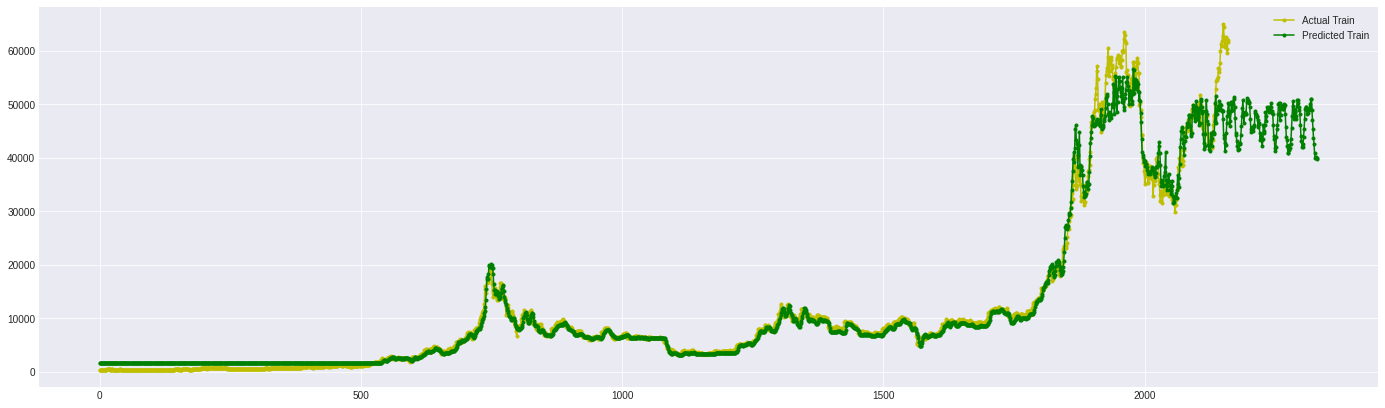

In [48]:
plt.figure(figsize=(24,7))

# log
plt.plot(np.exp(actual),'y', marker='.', label='Actual Train')
plt.plot(np.exp(predicted_btc_price), 'g', marker='.', label='Predicted Train')
# manoal
# plt.plot(actual,'y', marker='.', label='Actual Train')
# plt.plot(predicted_btc_price, 'g', marker='.', label='Predicted Train')


plt.legend()
plt.show()